# Explaining XGB Performance

In this notebok I will try some xAI techniques to understando how the XGB is performing

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from xgboost import XGBClassifier, DMatrix, train, plot_importance
import shap
shap.initjs()


## Imports

In [3]:
X_train = pd.read_pickle("data/model_input/X_train.pkl")
y_train = pd.read_pickle("data/model_input/y_train.pkl")
X_test = pd.read_pickle("data/model_input/X_test.pkl")
y_test = pd.read_pickle("data/model_input/y_test.pkl")

In [4]:
clf = pickle.load(open("data/models/xgb.sav", 'rb'))

## SHAP

In [5]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


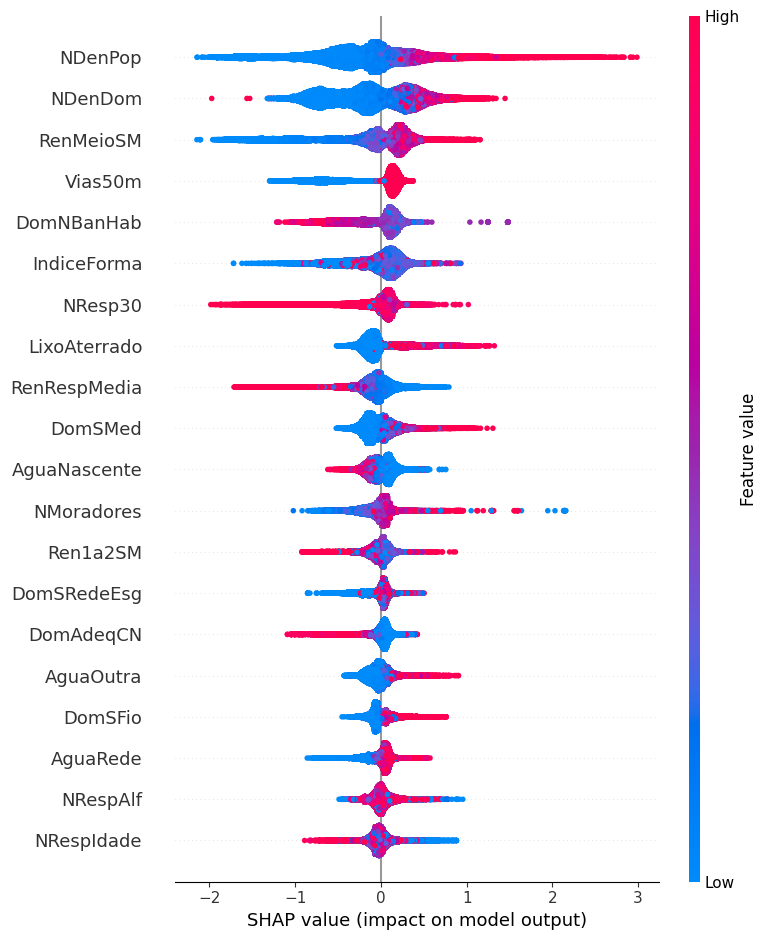

In [6]:
shap.summary_plot(shap_values, X_test)

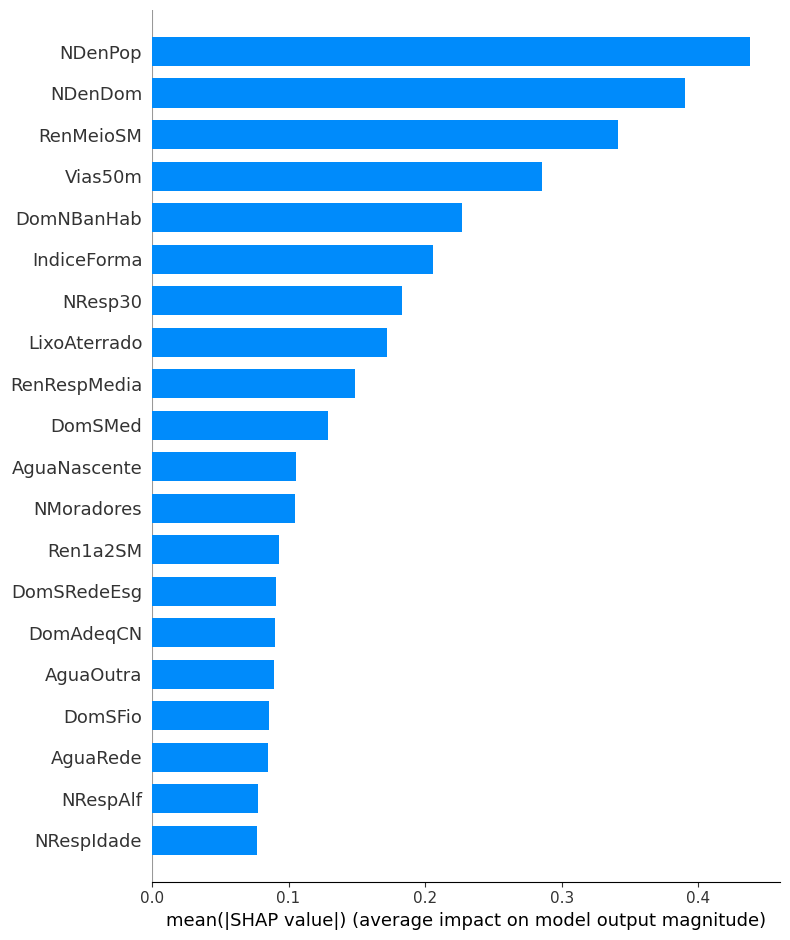

In [7]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

## Specific Features

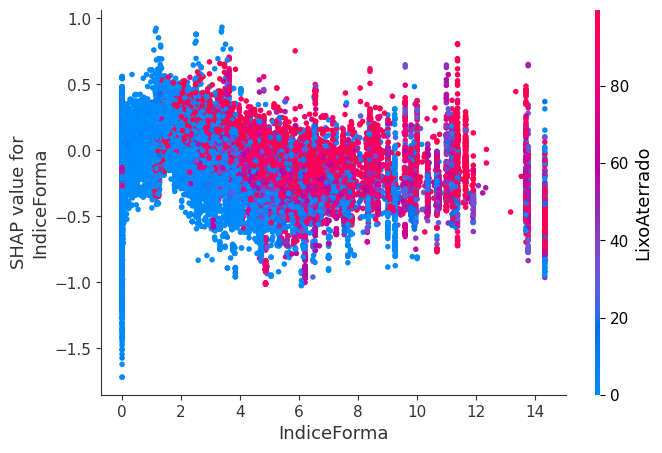

In [27]:
shap.dependence_plot("IndiceForma", shap_values, X_test, interaction_index="LixoAterrado")

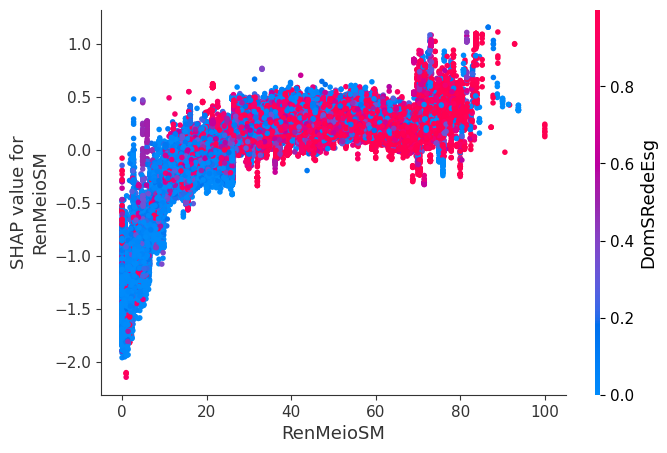

In [33]:
shap.dependence_plot("RenMeioSM", shap_values, X_test, interaction_index="DomSRedeEsg")